# Naive Bayes Classifier

In [10]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from collections import defaultdict
from sklearn.preprocessing import OrdinalEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

In [2]:
#robust for outliers, so we can try with the normal train
df=pd.read_csv('df_RFE_6Class_LOF.csv')
df2=df.drop(columns=['Unnamed: 0','label'])


In [3]:
df.describe()

,Unnamed: 0,tBodyAcc-entropy()-X,"tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-Y,tGravityAcc-max()-X,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-energy()-Y,...,fBodyAcc-max()-Y,fBodyAccJerk-max()-Y,"fBodyAccJerk-bandsEnergy()-1,16",fBodyGyro-maxInds-X,fBodyGyro-meanFreq()-X,fBodyAccMag-mad(),fBodyAccMag-energy(),fBodyBodyGyroJerkMag-std(),"angle(Y,gravityMean)",label
count,7037.000000,7037.000000,7037.000000,7037.000000,7037.000000,7037.000000,7037.000000,7037.000000,7037.000000,7037.000000,...,7037.000000,7037.000000,7037.000000,7037.000000,7037.000000,7037.000000,7037.000000,7037.000000,7037.000000,7037.000000
mean,3697.175643,-0.100908,-0.127995,0.105305,0.005326,0.613849,0.092002,0.690458,0.019239,-0.735058,...,-0.658804,-0.676802,-0.865473,-0.881086,-0.106176,-0.591428,-0.817057,-0.791428,0.063031,3.611624
std,2122.859232,0.468794,0.356768,0.380550,0.369567,0.500696,0.338073,0.495952,0.367749,0.432526,...,0.352031,0.370864,0.197145,0.180722,0.252482,0.438124,0.253459,0.264318,0.294985,1.739566
min,1.000000,-1.000000,-1.000000,-0.972219,-0.496213,-0.992959,-1.000000,-1.000000,-0.557830,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.999738,-1.000000,1.000000
25%,1870.000000,-0.576199,-0.371091,-0.145547,-0.240766,0.755489,-0.120604,0.819253,-0.226522,-0.966735,...,-0.980649,-0.988881,-0.999958,-1.000000,-0.275487,-0.983239,-0.999712,-0.993717,0.005039,2.000000
50%,3695.000000,-0.059767,-0.164671,0.147254,-0.147076,0.857879,0.032075,0.927325,-0.130855,-0.910471,...,-0.870361,-0.948987,-0.999393,-0.933333,-0.103347,-0.868424,-0.988124,-0.947959,0.184443,4.000000
75%,5547.000000,0.339343,0.065320,0.380518,0.114735,0.886779,0.223628,0.965295,0.129612,-0.775936,...,-0.350633,-0.381697,-0.782240,-0.866667,0.063186,-0.241532,-0.699291,-0.640511,0.249211,5.000000
max,7351.000000,0.919662,0.999028,0.999513,1.000000,1.000000,0.996585,1.000000,1.000000,1.000000,...,0.503617,1.000000,0.700314,0.466667,1.000000,1.000000,0.668058,1.000000,0.445582,6.000000


In [5]:
X = df2.values
y = np.array(df['label'])

df2.head()

,tBodyAcc-entropy()-X,"tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-Y,tGravityAcc-max()-X,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-energy()-Y,"tGravityAcc-arCoeff()-Y,1",...,fBodyAcc-max()-X,fBodyAcc-max()-Y,fBodyAccJerk-max()-Y,"fBodyAccJerk-bandsEnergy()-1,16",fBodyGyro-maxInds-X,fBodyGyro-meanFreq()-X,fBodyAccMag-mad(),fBodyAccMag-energy(),fBodyBodyGyroJerkMag-std(),"angle(Y,gravityMean)"
0,-0.714892,-0.013429,0.579382,-0.141551,0.892060,0.122586,0.984520,-0.114893,-0.970583,-0.196359,...,-0.999372,-0.973770,-0.984923,-0.999987,-1.000000,-0.048167,-0.975777,-0.999472,-0.996399,0.180289
1,-0.592235,-0.124698,0.608900,-0.142010,0.892401,0.094566,0.986770,-0.114893,-0.970368,-0.329023,...,-0.998158,-0.963072,-0.985351,-0.999963,-1.000000,-0.216685,-0.985594,-0.999807,-0.995127,0.180637
2,-0.627446,-0.305693,0.507459,-0.143976,0.893817,0.093425,0.986821,-0.121336,-0.969400,-0.295036,...,-0.997404,-0.987275,-0.987874,-0.999978,-1.000000,0.216862,-0.983524,-0.999770,-0.995237,0.181935
3,-0.786553,-0.155804,0.599213,-0.148750,0.893817,0.091682,0.987434,-0.121834,-0.967051,-0.166693,...,-0.999277,-0.980848,-0.990373,-0.999988,-1.000000,-0.153343,-0.992324,-0.999873,-0.995465,0.185151
4,-0.751869,-0.209979,0.180424,-0.148210,0.893683,0.083347,0.987722,-0.121834,-0.967321,-0.198125,...,-0.998598,-0.993414,-0.992801,-0.999987,-0.933333,-0.363040,-0.993851,-0.999939,-0.995239,0.184823


In [6]:
len(X)

7037

In [7]:
test = pd.read_csv('df_RFE_test.csv')
test2=test.drop(columns=['Unnamed: 0','label'])
test2.head()

,tBodyAcc-entropy()-X,"tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-Y,tGravityAcc-max()-X,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-energy()-Y,"tGravityAcc-arCoeff()-Y,1",...,fBodyAcc-max()-X,fBodyAcc-max()-Y,fBodyAccJerk-max()-Y,"fBodyAccJerk-bandsEnergy()-1,16",fBodyGyro-maxInds-X,fBodyGyro-meanFreq()-X,fBodyAccMag-mad(),fBodyAccMag-energy(),fBodyBodyGyroJerkMag-std(),"angle(Y,gravityMean)"
0,-0.168084,0.076989,-0.709003,-0.282719,0.906083,0.152895,0.944461,-0.262160,-0.864621,-0.795468,...,-0.968424,-0.940137,-0.958325,-0.998040,-1.0,0.184035,-0.726707,-0.953984,-0.907308,0.276801
1,-0.302437,-0.104983,0.399177,-0.289215,0.856176,0.152895,0.944461,-0.262160,-0.858163,-0.745687,...,-0.993051,-0.974357,-0.987087,-0.999641,-1.0,0.018109,-0.960680,-0.998476,-0.938212,0.281343
2,-0.617916,0.305653,0.279786,-0.287513,0.856269,0.139454,0.948704,-0.261661,-0.859947,-0.231640,...,-0.995082,-0.983773,-0.975581,-0.999954,-1.0,-0.479145,-0.977176,-0.999570,-0.983273,0.280083
3,-0.749578,-0.063792,0.544916,-0.293396,0.856269,0.136124,0.947309,-0.272916,-0.853713,-0.233036,...,-0.997495,-0.987887,-0.979580,-0.999949,-1.0,-0.496954,-0.976796,-0.999504,-0.985843,0.284114
4,-0.590576,0.235151,0.457718,-0.302961,0.853942,0.133541,0.946221,-0.279190,-0.843378,-0.493331,...,-0.995932,-0.972039,-0.975105,-0.999955,-1.0,-0.427502,-0.975706,-0.999500,-0.990572,0.290722


In [8]:
Xtest= test2.values
ytest = np.array(test['label'])

In [11]:
#Standardization
scaler = StandardScaler()
scaler.fit(X)
X_train = scaler.transform(X)
X_test = scaler.transform(Xtest)
X_train

array([[-1.30980081,  0.3211446 ,  1.24585712, ..., -0.7197526 ,
        -0.77552706,  0.3975334 ],
       [-1.04813966,  0.00923956,  1.32343052, ..., -0.72107358,
        -0.77071404,  0.39871463],
       [-1.12325497, -0.49811433,  1.05684661, ..., -0.72092948,
        -0.77112849,  0.4031133 ],
       ...,
       [ 0.58460261, -0.27703842, -0.79826092, ...,  0.69399573,
         0.24614516,  0.63097191],
       [ 0.55730234, -0.36379393, -0.77582703, ...,  0.60557383,
         0.38595214,  0.6217755 ],
       [ 0.88123414, -0.3880895 , -0.80310024, ...,  0.46941564,
         0.17520837,  0.62305121]])

## Data partitioning

In [16]:
#!pip install scikit-plot

In [17]:
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle

from sklearn.metrics import roc_curve, auc, roc_auc_score
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image
from sklearn import tree
import pydotplus

from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [19]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.metrics import ConfusionMatrixDisplay

In [20]:
naive = GaussianNB(var_smoothing= 0.05)
naive.fit(X, y)

GaussianNB(var_smoothing=0.05)

In [21]:
y_pred = naive.predict(Xtest)

In [22]:
print('Accuracy %s' % accuracy_score(ytest, y_pred))
print('F1-score %s' % f1_score(ytest, y_pred, average=None))
print(classification_report(ytest, y_pred))

Accuracy 0.8754665761791652
F1-score [0.91762452 0.89256198 0.8686606  0.71969697 0.82277466 1.        ]
              precision    recall  f1-score   support

           1       0.87      0.97      0.92       496
           2       0.87      0.92      0.89       471
           3       0.96      0.80      0.87       420
           4       0.95      0.58      0.72       491
           5       0.72      0.96      0.82       532
           6       1.00      1.00      1.00       537

    accuracy                           0.88      2947
   macro avg       0.89      0.87      0.87      2947
weighted avg       0.89      0.88      0.87      2947



In [23]:
print("Number of mislabeled points out of a total %d points : %d"
      % (Xtest.shape[0], (ytest != y_pred).sum()))

Number of mislabeled points out of a total 2947 points : 367


In [24]:
y_score=naive.predict_proba(Xtest)

In [29]:
y_score=naive.predict_proba(Xtest)
y_score[0:5]

array([[2.13224878e-19, 4.31785055e-15, 2.16109331e-21, 1.18723833e-03,
        9.98812762e-01, 9.27126363e-23],
       [2.93340003e-24, 6.93417627e-21, 4.20706011e-27, 1.02133184e-03,
        9.98978668e-01, 1.83765010e-24],
       [1.41701761e-25, 3.83683957e-27, 1.25729131e-28, 9.76765392e-05,
        9.99902323e-01, 5.52036329e-24],
       [3.31722809e-27, 1.13187939e-28, 1.76737567e-29, 1.63382696e-04,
        9.99836617e-01, 2.41911091e-24],
       [8.46560975e-27, 1.31881869e-24, 2.21708541e-29, 5.12608517e-05,
        9.99948739e-01, 4.67157345e-25]])

In [26]:
y_pred_prob_df = pd.DataFrame(data=y_score.round(3), columns=['1', '2','3','4','5','6'])

y_pred_prob_df

,1,2,3,4,5,6
0,0.0,0.0,0.0,0.001,0.999,0.0
1,0.0,0.0,0.0,0.001,0.999,0.0
2,0.0,0.0,0.0,0.000,1.000,0.0
3,0.0,0.0,0.0,0.000,1.000,0.0
4,0.0,0.0,0.0,0.000,1.000,0.0


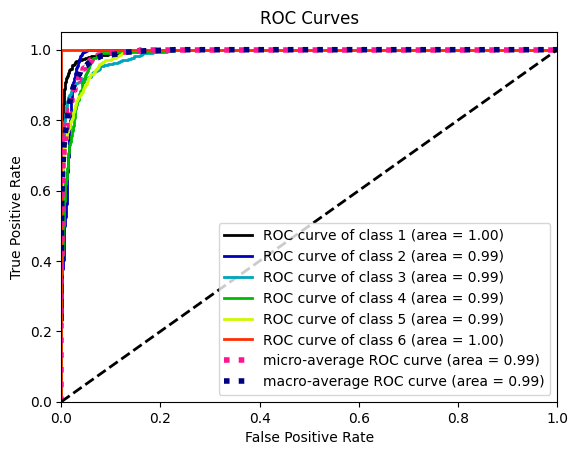

In [30]:
plot_roc(ytest, y_score)
plt.show()

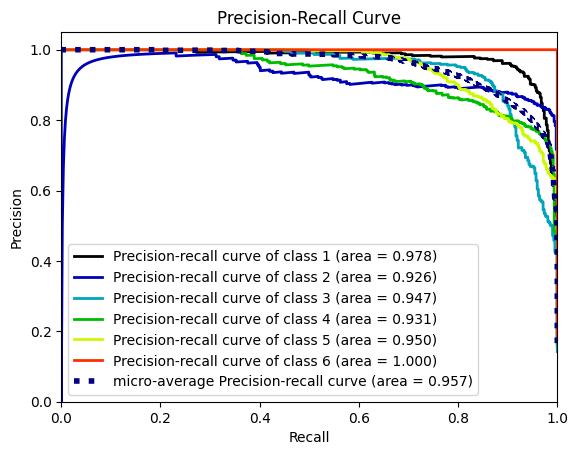

In [31]:
plot_precision_recall(ytest, y_score)
plt.show()

In [32]:
for i in range(20):
    p = naive.predict(X[i].reshape(1, -1))
    print (i, ":", X[i], "predicted: ", p[0], " real: ", y[i])
print ("error: ", sum(abs(np.array(naive.predict(X)) - np.array(y))))


0 : [-0.71489166 -0.01342866  0.57938169 -0.14155127  0.89206031  0.12258573
  0.98452014 -0.11489334 -0.97058275 -0.19635929 -0.10556772  0.8342711
  0.8304639  -0.86490382  0.83372106 -0.04703181  0.1693948  -0.99730134
  0.08156863 -0.99937173 -0.97377026 -0.98492321 -0.99998672 -1.
 -0.04816744 -0.97577688 -0.99947194 -0.99639947  0.18028889] predicted:  5  real:  5
1 : [-0.59223514 -0.12469839  0.60890014 -0.14200984  0.89240056  0.09456584
  0.9867701  -0.11489334 -0.97036812 -0.32902304 -0.25449019  0.714392
  0.72875542 -0.86490382  0.83372106  0.03231156 -0.35064613 -0.99542776
  0.0380491  -0.99815849 -0.96307185 -0.98535077 -0.99996277 -1.
 -0.21668507 -0.98559356 -0.99980673 -0.99512739  0.18063731] predicted:  5  real:  5
2 : [-0.62744626 -0.30569299  0.50745887 -0.14397645  0.89381715  0.09342467
  0.98682105 -0.12133575 -0.96939971 -0.29503597 -0.20628122  0.38637272
  0.38526306 -0.88532038  0.83416396  0.04455323 -0.72530106 -0.99707848
 -0.09285588 -0.99740352 -0.9872

In [33]:
error = 0
targets = y
predictions_GNB = naive.predict(X)
num_rows = len(y)
for i in range (0, num_rows):
    if predictions_GNB[i] != targets[i]:
        error += 1
print ("error: ", error/num_rows)
print ('accuracy: ', 1-error/num_rows)

error:  0.1013215859030837
accuracy:  0.8986784140969163


In [34]:
scores = cross_val_score(naive, X, y, cv=10)
print ('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))


Accuracy: 0.89 (+/- 0.09)


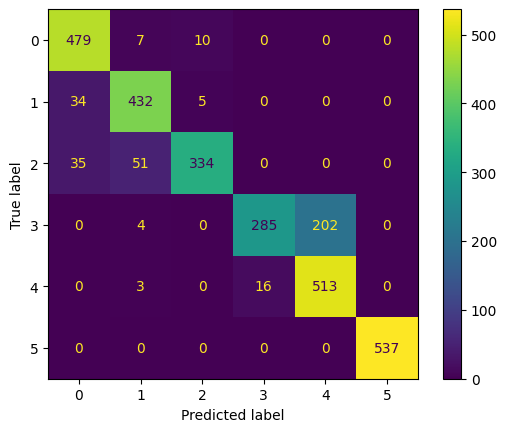

In [47]:
cm = confusion_matrix(ytest,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [48]:
print('Model test Score: %.3f, ' %naive.score(Xtest, ytest),
      'Model training Score: %.3f' %naive.score(X, y))

Model test Score: 0.875,  Model training Score: 0.899


In [49]:
naive.class_prior_

array([0.16796931, 0.15063237, 0.13826915, 0.1725167 , 0.18615887,
       0.1844536 ])

In [50]:
from sklearn.naive_bayes import BernoulliNB

In [51]:
naive2 = BernoulliNB(binarize=0)
naive2.fit(X, y)

BernoulliNB(binarize=0)

In [52]:
y_pred2 = naive2.predict(Xtest)

In [53]:
print('Accuracy %s' % accuracy_score(ytest, y_pred2))
print('F1-score %s' % f1_score(ytest, y_pred2, average=None))
print(classification_report(ytest, y_pred2))

Accuracy 0.7617916525279945
F1-score [0.66736402 0.64758144 0.75852273 0.68879668 0.78209459 0.99906803]
              precision    recall  f1-score   support

           1       0.69      0.64      0.67       496
           2       0.61      0.70      0.65       471
           3       0.94      0.64      0.76       420
           4       0.70      0.68      0.69       491
           5       0.71      0.87      0.78       532
           6       1.00      1.00      1.00       537

    accuracy                           0.76      2947
   macro avg       0.78      0.75      0.76      2947
weighted avg       0.77      0.76      0.76      2947



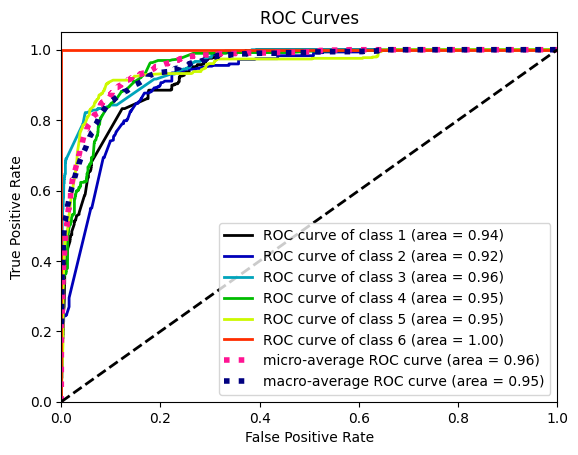

In [54]:
y_score2=naive2.predict_proba(Xtest)
plot_roc(ytest, y_score2)
plt.show()

In [55]:
print('Model test Score: %.3f, ' %naive2.score(Xtest, ytest),
      'Model training Score: %.3f' %naive2.score(X, y))

Model test Score: 0.762,  Model training Score: 0.825


In [66]:
predictions_naive2 = cross_val_predict(naive2, X, y)
cm = confusion_matrix(y,predictions_naive2)
cm

array([[ 784,  347,   18,   24,    9,    0],
       [  99,  873,   59,   24,    5,    0],
       [  30,  158,  766,    3,   16,    0],
       [  11,    5,    0,  890,  308,    0],
       [  41,    9,    0,  109, 1151,    0],
       [   0,    6,    0,    1,    1, 1290]])

In [56]:
## CROSS

In [57]:
scores2 = cross_val_score(naive2, X, y, cv=10)
print ('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.89 (+/- 0.09)


In [69]:
scores = cross_val_score(naive, X_train, y, cv=10)
print('Accuracy: %0.4f (+/- %0.3f)' % (scores.mean(), scores.std()))

scores = cross_val_score(naive, X_train, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.3f)' % (scores.mean(), scores.std()))

scores2 = cross_val_score(naive2, X_train, y, cv=10)
print('Accuracy: %0.4f (+/- %0.3f)' % (scores2.mean(), scores2.std()))

scores2 = cross_val_score(naive2, X_train, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.3f)' % (scores2.mean(), scores2.std()))



Accuracy: 0.8914 (+/- 0.046)
F1-score: 0.8870 (+/- 0.049)
Accuracy: 0.8224 (+/- 0.051)
F1-score: 0.8135 (+/- 0.053)


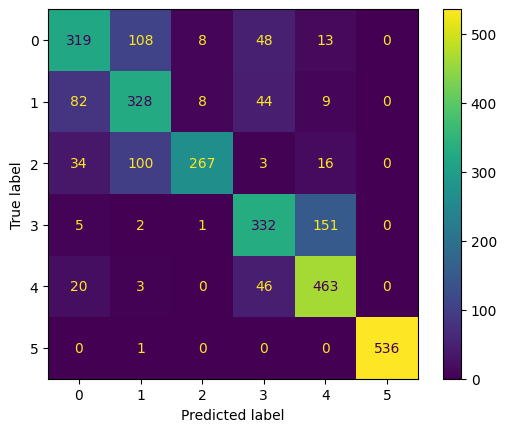

In [72]:
cm = confusion_matrix(ytest,y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [74]:
from sklearn.preprocessing import OrdinalEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

In [75]:
features = df2.columns.tolist()
vif2 = pd.DataFrame()
vif2["VIF"] = [variance_inflation_factor(scaler.transform(df2.values), i) for i in range(len(features))]
vif2["Features"] = features
vif2

,VIF,Features
0,6.364796,tBodyAcc-entropy()-X
1,1.642806,"tBodyAcc-correlation()-X,Y"
2,1.891023,"tBodyAcc-correlation()-Y,Z"
3,767.830812,tGravityAcc-mean()-Y
4,261.041119,tGravityAcc-max()-X
5,3.206363,tGravityAcc-max()-Z
6,264.428077,tGravityAcc-min()-X
7,453.932747,tGravityAcc-min()-Y
8,17.258375,tGravityAcc-energy()-Y
9,34.268578,"tGravityAcc-arCoeff()-Y,1"


# Cat

In [82]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import LabelEncoder
from pandas import DataFrame

# Proof with 7 variables (not good)

In [84]:
newdata=[df2['tBodyAcc-correlation()-X,Y'],df2['tBodyAcc-correlation()-Y,Z'],df2['tGravityAcc-max()-Z'],df2['tBodyGyro-arCoeff()-Y,1'],df2['tBodyGyro-correlation()-Y,Z'],df2['fBodyGyro-maxInds-X'],df2['fBodyGyro-meanFreq()-X']]
newdf = pd.DataFrame(newdata).transpose()
Xp=newdf.values

In [85]:
newte=[test2['tBodyAcc-correlation()-X,Y'],test2['tBodyAcc-correlation()-Y,Z'],test2['tGravityAcc-max()-Z'],test2['tBodyGyro-arCoeff()-Y,1'],test2['tBodyGyro-correlation()-Y,Z'],test2['fBodyGyro-maxInds-X'],test2['fBodyGyro-meanFreq()-X']]
newtest = pd.DataFrame(newte).transpose()
Xt=newtest.values

In [86]:
#prova con gaussian
clfp = GaussianNB()
clfp.fit(Xp, y)

GaussianNB()

In [87]:
y_predp = clfp.predict(Xt)
print('Accuracy %s' % accuracy_score(ytest, y_predp))
print('F1-score %s' % f1_score(ytest, y_predp, average=None))
print(classification_report(ytest, y_predp))

Accuracy 0.5866983372921615
F1-score [0.5374359  0.52960894 0.62421973 0.45173383 0.64799253 0.72258065]
              precision    recall  f1-score   support

           1       0.55      0.53      0.54       496
           2       0.56      0.50      0.53       471
           3       0.66      0.60      0.62       420
           4       0.42      0.49      0.45       491
           5       0.64      0.65      0.65       532
           6       0.72      0.73      0.72       537

    accuracy                           0.59      2947
   macro avg       0.59      0.58      0.59      2947
weighted avg       0.59      0.59      0.59      2947



# Other approach (the best)

In [88]:
# perform a uniform discretization transform of the dataset
trans = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
data = trans.fit_transform(X)
dataset = DataFrame(data)
dataset

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 23 are removed. Consider decreasing the number of bins.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.0,3.0,4.0,2.0,4.0,3.0,4.0,2.0,1.0,3.0,...,0.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0,0.0,2.0
1,1.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,1.0,2.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0
2,0.0,1.0,4.0,2.0,4.0,3.0,4.0,2.0,1.0,2.0,...,0.0,0.0,1.0,0.0,0.0,4.0,1.0,1.0,0.0,2.0
3,0.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,1.0,3.0,...,0.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0
4,0.0,2.0,2.0,2.0,4.0,2.0,4.0,2.0,1.0,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7032,3.0,2.0,0.0,1.0,2.0,2.0,2.0,1.0,2.0,0.0,...,3.0,4.0,2.0,3.0,0.0,0.0,4.0,4.0,3.0,3.0
7033,2.0,2.0,0.0,1.0,2.0,2.0,2.0,1.0,2.0,0.0,...,3.0,4.0,2.0,3.0,1.0,0.0,4.0,4.0,3.0,3.0
7034,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,...,4.0,4.0,2.0,3.0,1.0,1.0,3.0,4.0,3.0,3.0
7035,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,...,4.0,4.0,3.0,3.0,1.0,0.0,3.0,3.0,3.0,3.0


In [89]:
X_train_cat, X_test_cat, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=100, stratify=y)

In [90]:
clfc = CategoricalNB()
clfc.fit(X_train_cat, y_train)

CategoricalNB()

In [91]:
y_pred = clfc.predict(X_test_cat)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9100378787878788
F1-score [0.94152047 0.91551459 0.91457286 0.84487535 0.88571429 0.9575    ]
              precision    recall  f1-score   support

           1       0.98      0.91      0.94       355
           2       0.89      0.94      0.92       318
           3       0.90      0.93      0.91       292
           4       0.85      0.84      0.84       364
           5       0.90      0.87      0.89       393
           6       0.93      0.98      0.96       390

    accuracy                           0.91      2112
   macro avg       0.91      0.91      0.91      2112
weighted avg       0.91      0.91      0.91      2112



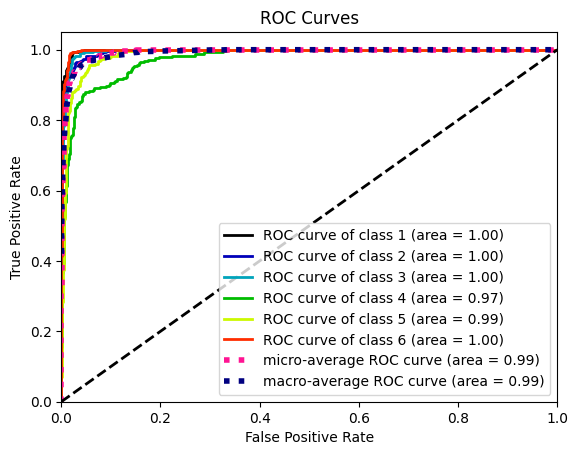

In [92]:
y_score4=clfc.predict_proba(X_test_cat)
plot_roc(y_test, y_score4)
plt.show()

In [93]:
y_score4[0:10,:].round(2)

array([[0.  , 0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 0.01, 0.99, 0.  ],
       [0.  , 0.  , 0.  , 0.99, 0.01, 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  ]])

In [95]:
print('Model test Score: %.3f, ' %clfc.score(X_test_cat, y_test),
      'Model training Score: %.3f' %clfc.score(X_train_cat, y_train))

Model test Score: 0.910,  Model training Score: 0.909
